In [28]:
import requests
import json

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


In [22]:
df = pd.DataFrame()

for month in range(1,13):
  for day in range(1,32):
      url = f'https://opendata.elia.be/api/explore/v2.1/catalog/datasets/ods032/records?select=datetime%2C%20measured&where=region%20%3D%20%27Luxembourg%27&limit=100&refine=datetime%3A2023-{month:02d}-{day:02d}'
      r = requests.get(url)
      if r.status_code == 200:
          temp_df = pd.DataFrame(r.json()['results'])
          print(f'Done {day}/{month}/2023')
          df = pd.concat([df, temp_df], ignore_index=True)
      else:
          print(f'{day}: {r.status_code}')

df = df.rename(columns={'datetime':'ds','measured':'y'})
df.ds = pd.to_datetime(df.ds, utc=True)
df.ds = df.ds.dt.tz_localize(None)

df

Done 1/1/2023
Done 2/1/2023
Done 3/1/2023
Done 4/1/2023
Done 5/1/2023
Done 6/1/2023
Done 7/1/2023
Done 8/1/2023
Done 9/1/2023
Done 10/1/2023
Done 11/1/2023
Done 12/1/2023
Done 13/1/2023
Done 14/1/2023
Done 15/1/2023
Done 16/1/2023
Done 17/1/2023
Done 18/1/2023
Done 19/1/2023
Done 20/1/2023
Done 21/1/2023
Done 22/1/2023
Done 23/1/2023
Done 24/1/2023
Done 25/1/2023
Done 26/1/2023
Done 27/1/2023
Done 28/1/2023
Done 29/1/2023
Done 30/1/2023
Done 31/1/2023
Done 1/2/2023
Done 2/2/2023
Done 3/2/2023
Done 4/2/2023
Done 5/2/2023
Done 6/2/2023
Done 7/2/2023
Done 8/2/2023
Done 9/2/2023
Done 10/2/2023
Done 11/2/2023
Done 12/2/2023
Done 13/2/2023
Done 14/2/2023
Done 15/2/2023
Done 16/2/2023
Done 17/2/2023
Done 18/2/2023
Done 19/2/2023
Done 20/2/2023
Done 21/2/2023
Done 22/2/2023
Done 23/2/2023
Done 24/2/2023
Done 25/2/2023
Done 26/2/2023
Done 27/2/2023
Done 28/2/2023
29: 400
30: 400
31: 400
Done 1/3/2023
Done 2/3/2023
Done 3/3/2023
Done 4/3/2023
Done 5/3/2023
Done 6/3/2023
Done 7/3/2023
Done 8/3/20

,ds,y
0,2023-01-01 10:45:00,10.442
1,2023-01-01 10:30:00,8.556
2,2023-01-01 09:00:00,3.396
3,2023-01-01 08:00:00,0.664
4,2023-01-01 07:15:00,0.000
...,...,...
35035,2023-12-31 03:15:00,0.000
35036,2023-12-31 02:30:00,0.000
35037,2023-12-31 01:30:00,0.000
35038,2023-12-31 01:15:00,0.000


In [44]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(periods=96)
forecast = model.predict(future)
forecast_future = forecast[35040:35040+96]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfaczy26/i2klx5s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfaczy26/q16xbylz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51068', 'data', 'file=/tmp/tmpjfaczy26/i2klx5s4.json', 'init=/tmp/tmpjfaczy26/q16xbylz.json', 'output', 'file=/tmp/tmpjfaczy26/prophet_model_nxxrxya/prophet_model-20241024193901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


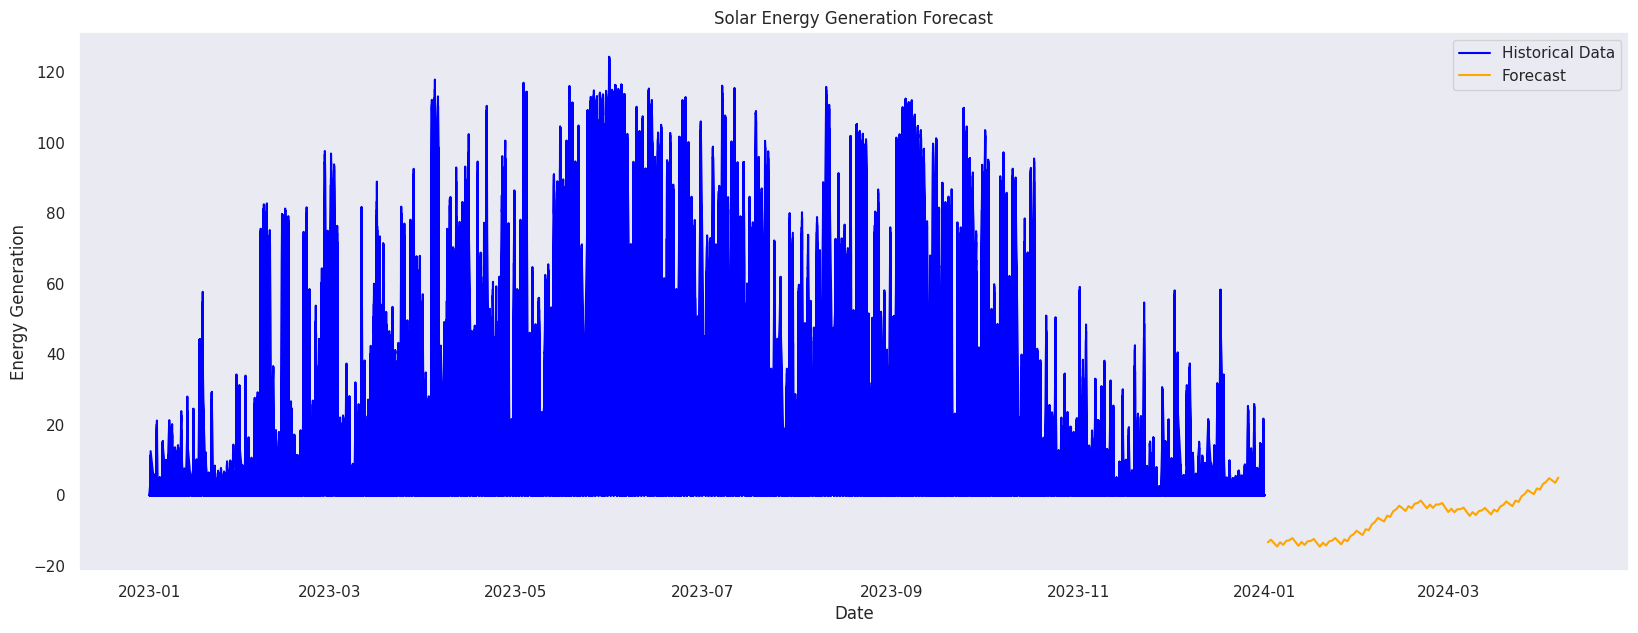

In [45]:
plt.figure(figsize=(20, 7))
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast', color='orange')
# plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)

plt.title('Solar Energy Generation Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Generation')
plt.legend()
plt.grid()
plt.show()